In [1]:
#------------------------------------
#  German Hernández/Laura Castillo
#-----------------------------------
import numpy as np
from scipy import optimize
from scipy import integrate
from matplotlib import pyplot as plt
from  sklearn.metrics import r2_score
import sympy as sp

In [106]:
#Función para realizar una regresion según el orden 
#Devuelve R^2,coeficientes y el grafico
def Reg(x,y,n):
	x=np.asarray(x)
	y=np.asarray(y)
	poli=np.polyfit(x,y,n)
	model=np.poly1d(poli)
	R2=r2_score(y,model(x))
	plt.scatter(x,y,color="red")
	plt.plot(x,model(x),"b-")
	plt.grid(True)
	return poli,R2,plt.show()

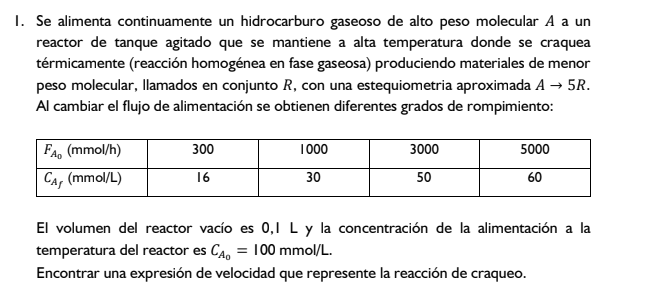

In [3]:
V=0.1 #L
CA0=100 #mmol/L
Fa_0=np.asarray([300,1000,3000,5000]) #mmol/h
CAf=np.asarray([16,30,50,60])
#Hallamos el caudal
v0=Fa_0/CA0 #L/h
print("Caudal_0= ",v0)

Caudal_0=  [ 3. 10. 30. 50.]


In [4]:
e_A=4
XA=(CA0-CAf)/(CA0+(e_A*CAf))
print("XA =",XA)

XA = [0.51219512 0.31818182 0.16666667 0.11764706]


In [5]:
#Despejando de la ecuación de diseño 
_rA=(CA0*XA*v0)/(V)
print("-rA =",_rA)

-rA = [1536.58536585 3181.81818182 5000.         5882.35294118]


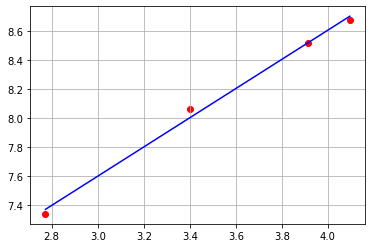

Coeficientes : [1.01129001 4.56479588]
R^2 : 0.9950557019991247
n = 1.0112900125920232
k= 96.0429880477573


In [107]:
#Linealización para encontrar el orden
x=np.log(CAf)
y=np.log(_rA)
Orden=Reg(x,y,1)
print("Coeficientes :",Orden[0])
print("R^2 :", Orden[1])
print("n =",Orden[0][0])
print("k=",np.exp(Orden[0][1]))

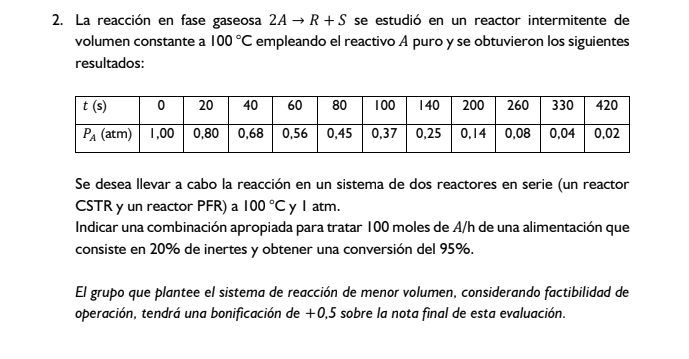

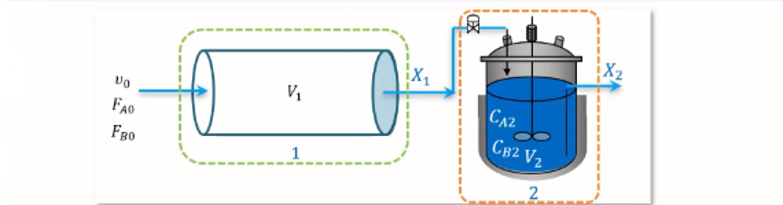

In [108]:
import sympy as sp
from scipy.optimize import fsolve
#Primero el PFR despues el CSTR
#Datos
R=0.08206 #atm*L/mol*K
T=373.15 #K
P=1 #atm
F_A0=100
X_A2=0.95
v_0=(F_A0*R*T)/P
k=17.1
X_A1=sp.symbols("X_A1")
#Supongo relacion de volumenes 
n=np.linspace(1,10,10)
#print(n)

results=[]
for i in list(range(0,len(n))):
    fs=lambda x: (n[i]*(v_0/(2*k))*(-np.log(1-x)))-((v_0*(X_A2-x))/((2*k)*(1-X_A2)))
    sol=fsolve(fs,0.1)
    sol=list(sol)
    sol.append(results) 
    #print(sol)
    
V1=(v_0/(2*k))*(-np.log(1-0.7450165212369376))    
V2=(v_0*(X_A2-0.7450165212369376))/((2*k)*(1-X_A2))
#print(V1,V2)

La conversión a la salida del primer reactor fue:
$$ \ X_{A1}= 0.85384 $$
El volumen de cada reactor fue:
$$ \ V_1=V_2=172.182 L $$

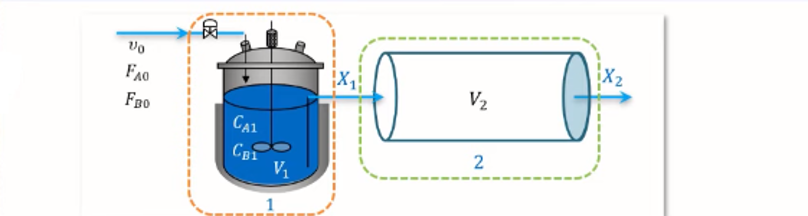

In [110]:
#Segunda disposición primero el CSTR y despues el PFR
results2=[]
for i in list(range(0,len(n))):
    f2=lambda x: (n[i]*(v_0*(x))/(2*k*(1-x))-((v_0/(2*k))*(-np.log(abs(1-X_A2))+np.log(abs(1-x)))))
    sol2=fsolve(f2,0.1)
    sol2=list(sol2)
    sol2.append(results2)
    #print(sol2)
#x=0.4451333788772099
V1B=(v_0*(x))/(2*k*(1-x))
V2B=(v_0/(2*k))*(-np.log(1-X_A2)+np.log(1-x))
#print(V1B,V2B)    

La conversión a la salida del primer reactor fue:
$$ \ X_{A1}= 0.658 $$
El volumen de cada reactor fue:
$$ \ V_1=V_2=172.182 L $$